# Multi-Class Prediction of Obesity Risk

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ML1">EDA.</a></li>
<li><a href="#ML2">ML.</a></li>
<li><a href="#ML6">Apply the selected model.</a></li>
</ul>

<a id='intro'></a>
## `Introduction`

### Dataset Description 

 - This [dataset](https://www.kaggle.com/competitions/playground-series-s4e2) The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.The dataset consists of 17 columns:
--------------------------------
|Column  | 	Description
|:------------- | :-------------
|Gender | Male/Femal
|Age  | Between 14 to 61
|Height |Between 1.45 to 1.98
|Weight |Between 39 to 173.
|family_history_with_overweight | True/False.
|FAVC | Frequent consumption of high caloric food.
|FCVC | Frequency of consumption of vegetables.
|NCP | Number of main meals.
|CAEC | Consumption of food between meals .
|SMOKE | True / False
|CH2O | Consumption of water daily
|SCC | The attributes related with the physical condition are: Calories consumption monitoring
|FAF | Physical activity frequency
|TUE | Time using technology devices
|CALC | Consumption of alcohol.
|MTRANS | Transportation used 
|NObeyesdad | * Underweight Less than 18.5 <br> * Normal 18.5 to 24.9 <br>* Overweight 25.0 to 29.9 <br> * Obesity I 30.0 to 34.9 <br> * Obesity II 35.0 to 39.9 <br> * Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association.

<a id='wrangling'></a>
## `Data Wrangling`


> In this section we will clarify the data to analyze it and answer the questions easily.

In [1]:
# Import the laibraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import optuna

In [2]:
# We have got an extened data
train=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv', index_col="id")
df_test =pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
id_df_test=pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
obesity = pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")

df_train = pd.concat([train, obesity], axis=0)

In [3]:
# describe the descriptive & continuous values
df_info,df_str,df_num = df_train.info(),df_train.describe(include="O"),df_train.describe()
display(df_info,df_str,df_num)

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             22869 

None

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,22869,22869,22869,22869,22869,22869,22869,22869,22869
unique,2,2,2,4,2,2,4,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,11465,18740,20848,19294,22580,22086,16467,18267,4370


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,23.885263,1.700377,87.767610,2.443428,2.754344,2.027442,0.984382,0.620551
std,5.753419,0.087881,26.364243,0.533329,0.712711,0.608901,0.839466,0.602850
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,22.815416,1.700000,84.000000,2.392665,3.000000,2.000000,1.000000,0.579541
75%,26.000000,1.763029,111.531208,3.000000,3.000000,2.535127,1.596576,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
df_train.drop_duplicates(df_train,inplace=True)
df_train.duplicated().sum()

0

In [5]:
df_train.isnull().sum()
df_train.dropna(inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  object 
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  object 
 5   FAVC                            22845 non-null  object 
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  float64
 8   CAEC                            22845 non-null  object 
 9   SMOKE                           22845 non-null  object 
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  object 
 12  FAF                             22845 

Now the data is cleaned, let's start to explore the data.

<a id='ML1'></a>
## `EDA (Exploratory Data Analysis)`

In [7]:
def plot(df,column):
    # Sort the dataframe by the count of each category in descending order
    df_sorted = df[column].value_counts().sort_values(ascending=False)

    # Create a figure and axis with subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Flatten the axis array
    ax = ax.flatten()

    # Plot countplot on the first subplot
    sns.countplot(data=df, y=column, order=df_sorted.index, palette="Set2", ax=ax[0])

    # Annotate count values on the bars
    for i, v in enumerate(df_sorted):
        ax[0].text(v + 3, i, str(v), color='black', va='center')

    # Plot pie chart on the second subplot
    colors = sns.color_palette("Set2")
    ax[1].pie(x=df[column].value_counts(), labels=df[column].value_counts().index,
               colors=colors, autopct='%1.1f%%')

    # Set title for each subplot
    ax[0].set_title('Count Plot (Descending)')
    ax[1].set_title('Pie Chart')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

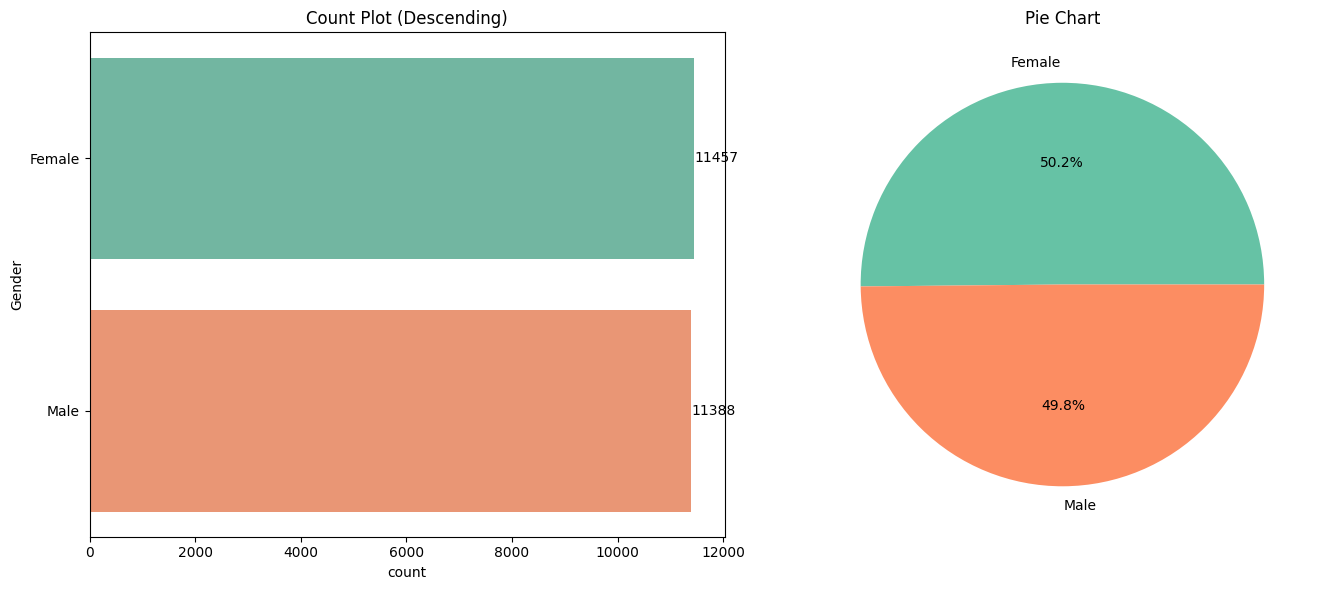

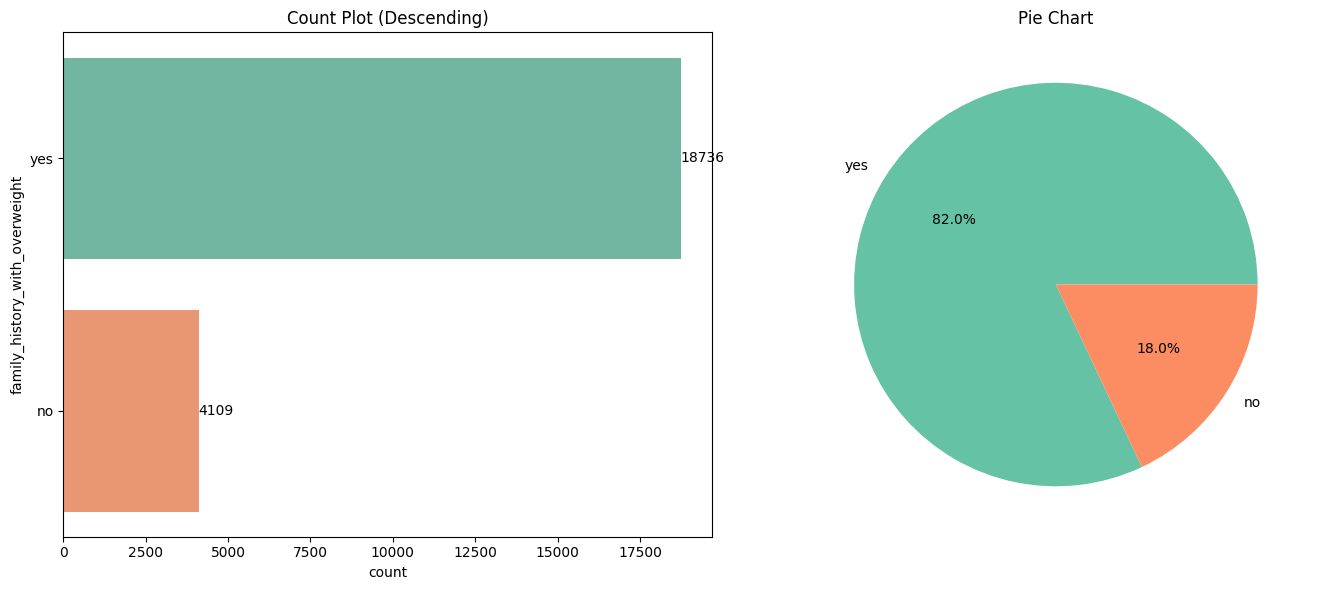

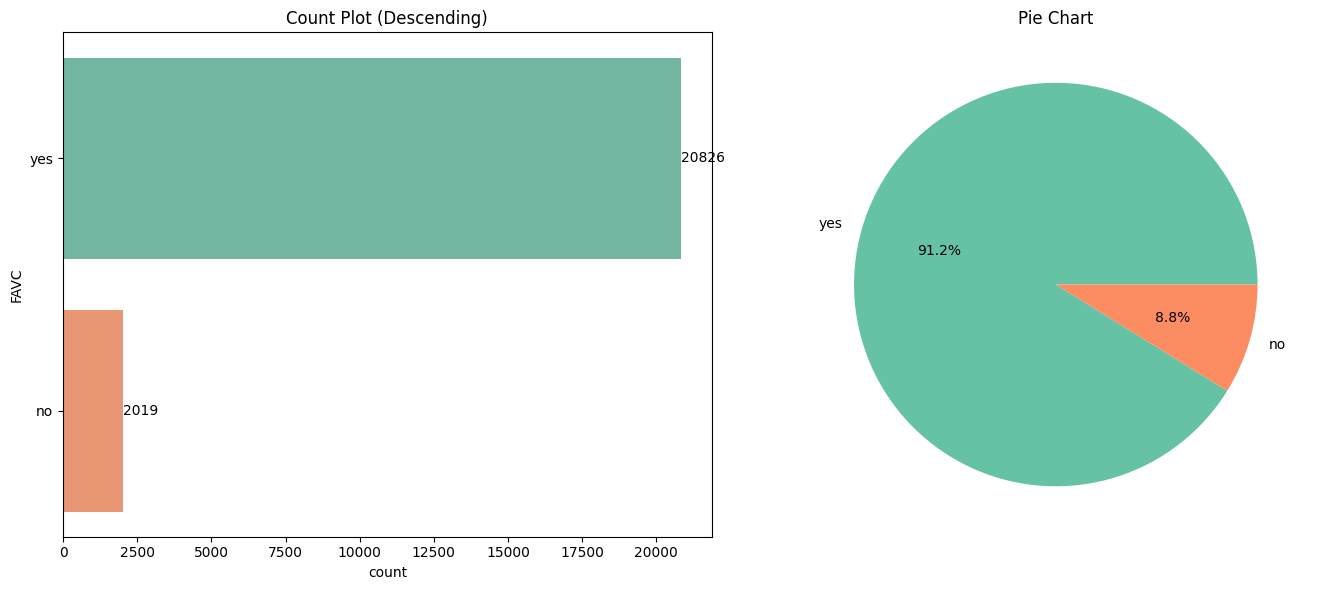

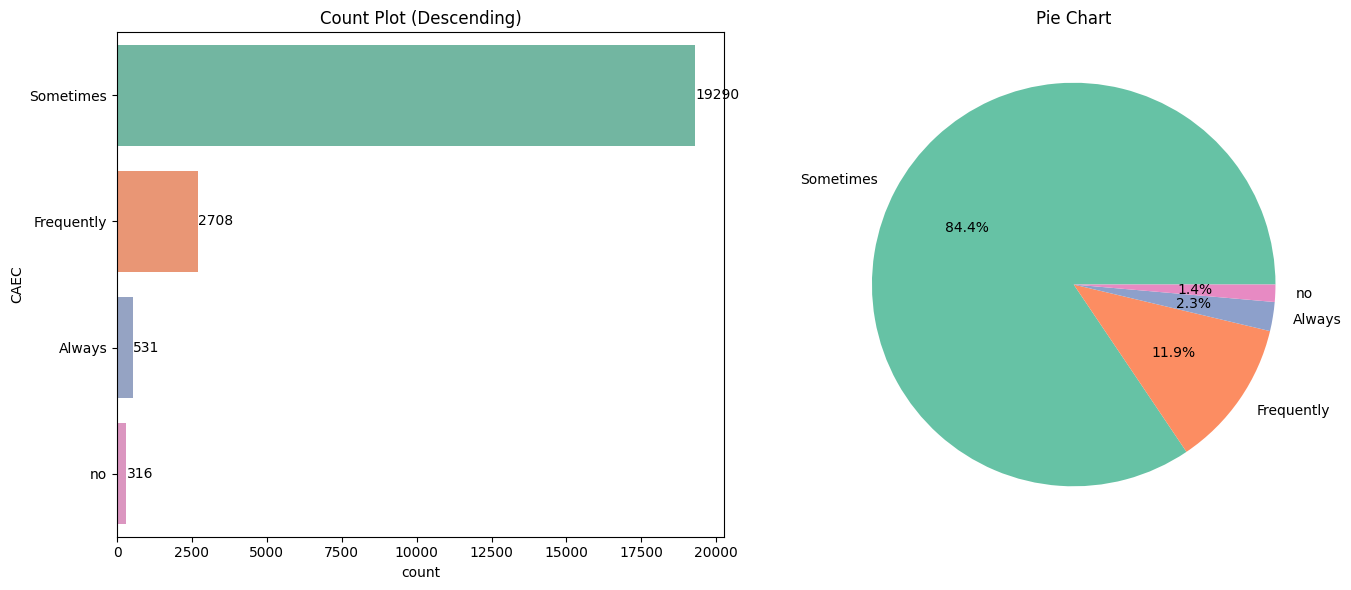

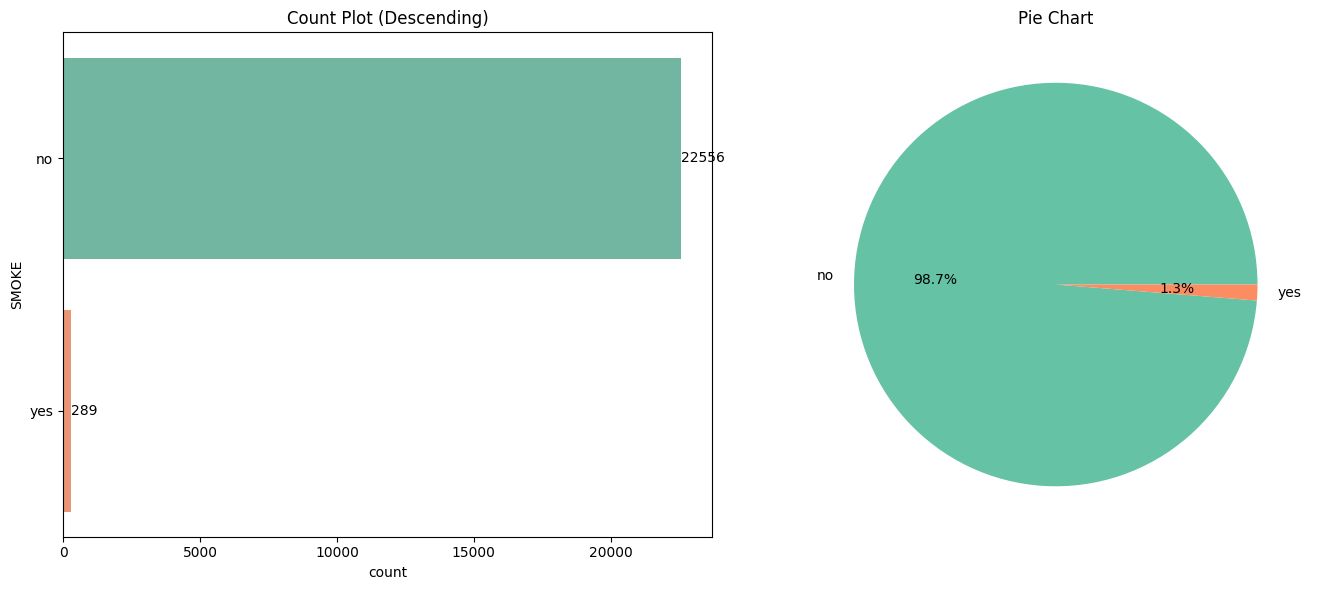

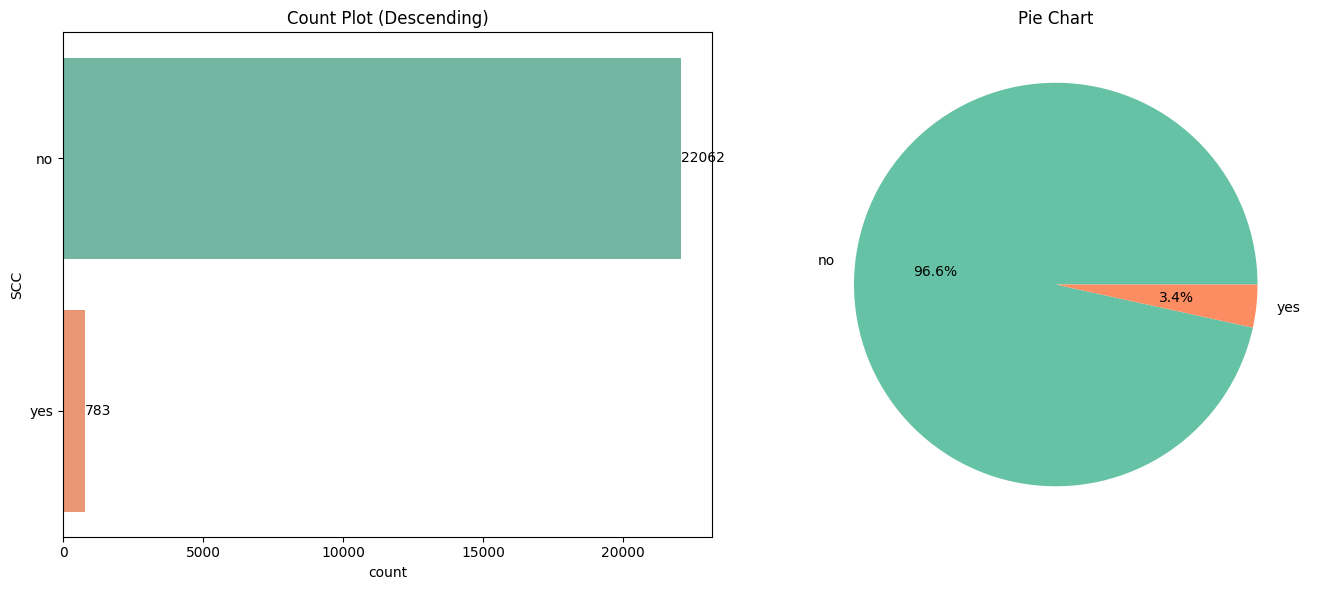

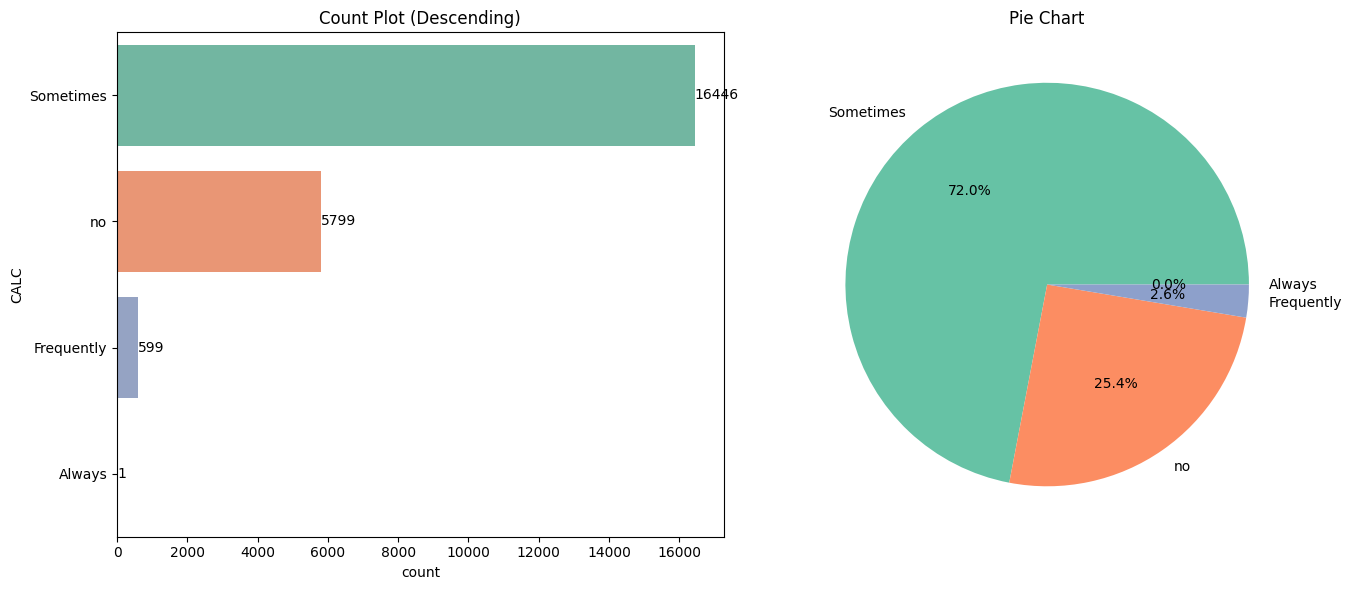

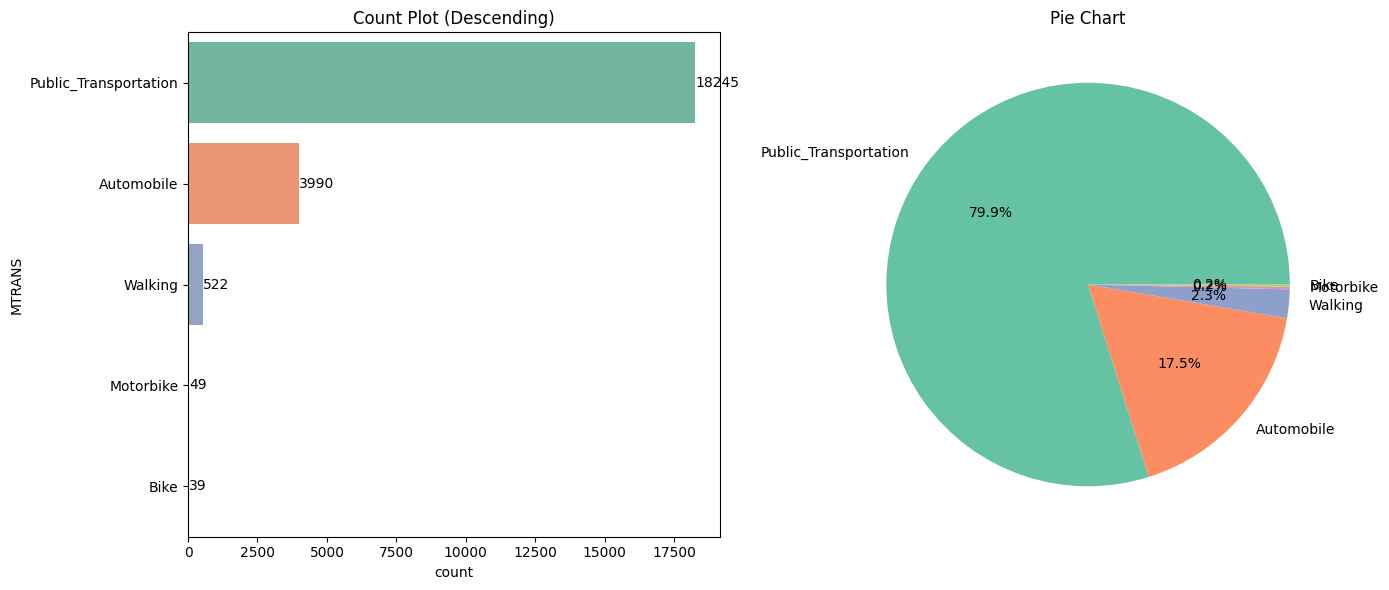

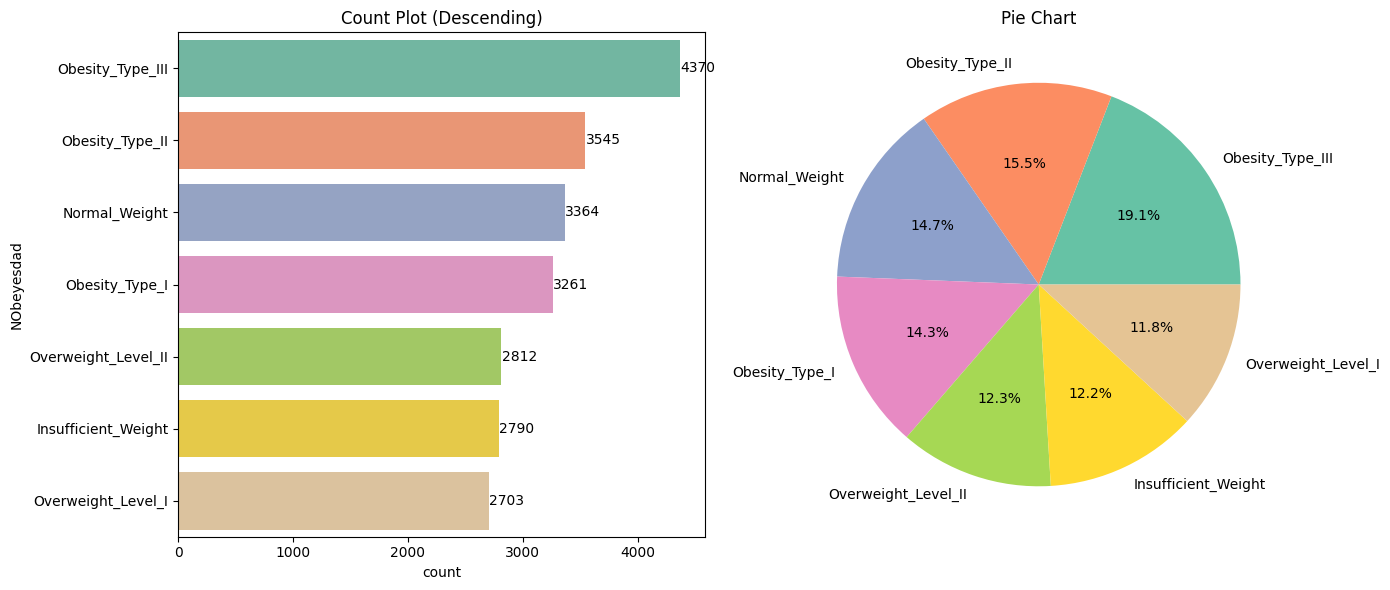

In [8]:
# Lets explore the objective data using count plot and pie chart. 
for i in df_train.describe(include="O").columns:
    plot(df_train,i)

As we see the above plots :<br>
    1- Around 82% of the family history is over wighted<br>
    2- Regarding FAVC (Frequent consumption of high caloric food) around 91% have high caloric food.<br>
    3- CAEC (Consumption of food between meals) all most is consume a food between the meals.<br>
    4- All most of the people in the data are not smoke, I think we can dig more about to answer some questions such as is the smoker are not fat ?

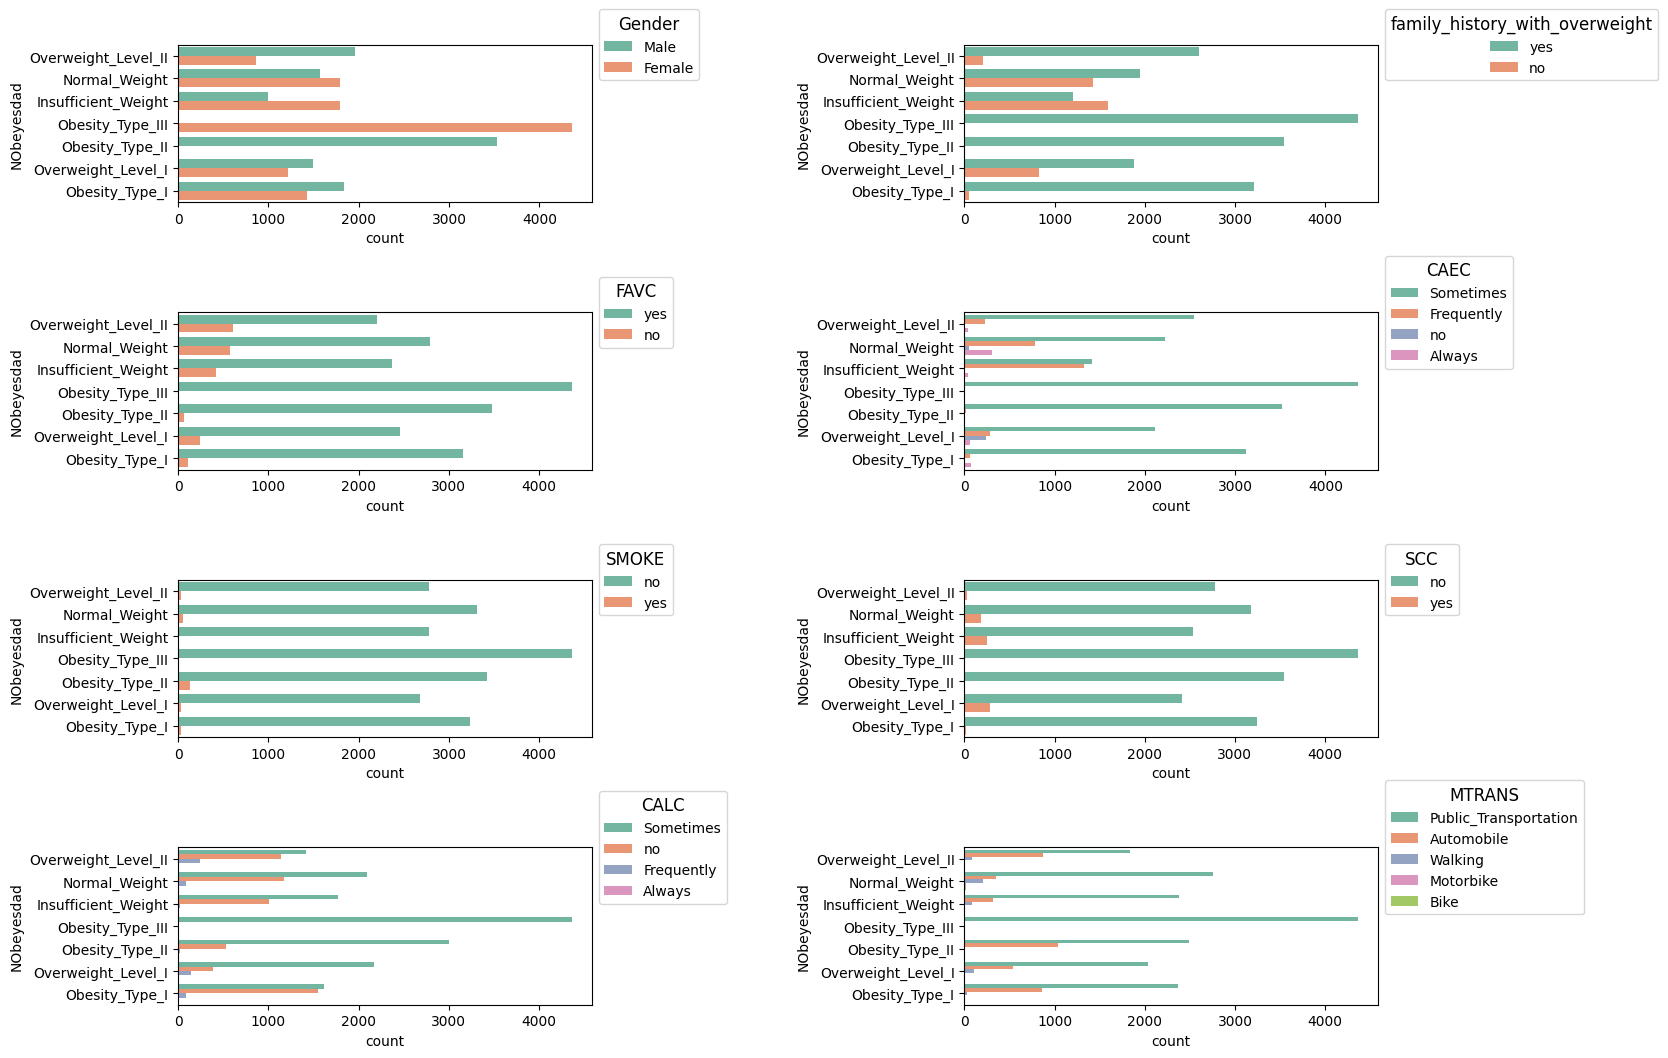

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot2(df):
    # Create a figure and axis with subplots
    fig, ax = plt.subplots(4, 2, figsize=(15, 12))

    # Flatten the axis array
    ax = ax.flatten()
    
    # Lets explore the objective data using count plot and pie chart. 
    for i,v in enumerate(df.describe(include="O").columns[:-1]):
        # Plot countplot on the first subplot
        sns.countplot(data=df, y="NObeyesdad",hue=v, palette="Set2", ax=ax[i])
        # Adjust positions
        ax[i].tick_params(axis='y', rotation=0)
        
        # Move the legend outside the plot
        legend = ax[i].legend(loc='center left', bbox_to_anchor=(1, 1),title=v)
        legend.get_title().set_fontsize('12')  # Set the legend title fontsize

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=.7)

plot2(df_train)


* The PLot above Clarify that:<br>
1- Arounf 98% of the the class Obesity_type_III if Female, However the class Obesity_type_II is allmost Male.<br>
2- All most of the class Obesity_type_III and Obesity_type_II has a family history with overweight

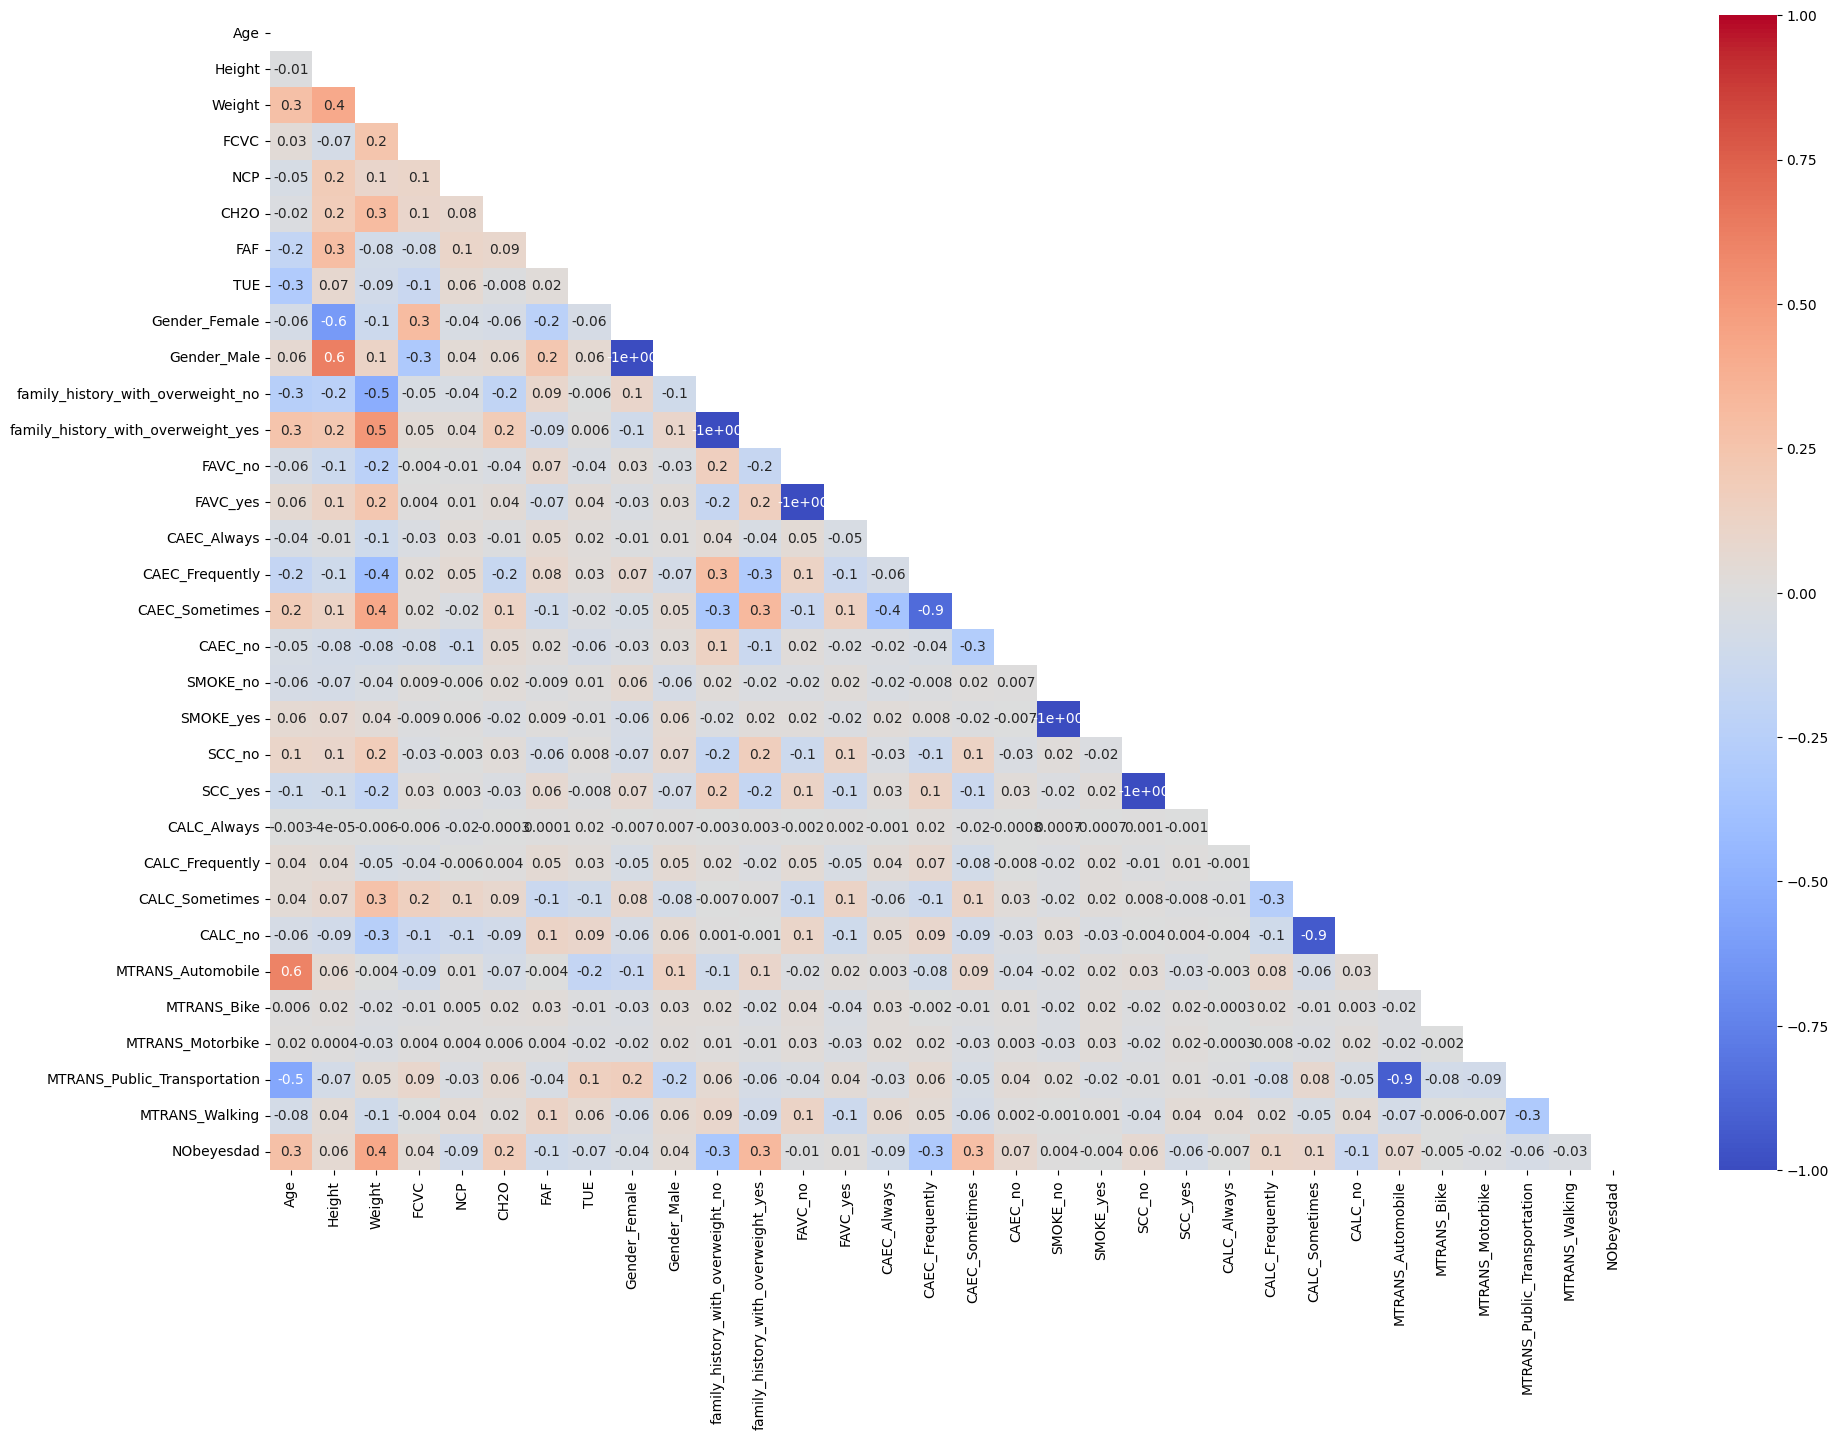

In [10]:
tr=df_train.copy()
df_train=pd.get_dummies(df_train[df_train.columns[0:-1]])
df_train["NObeyesdad"]=tr["NObeyesdad"]
LE = LabelEncoder()
df_train["NObeyesdad"]=LE.fit_transform(df_train.NObeyesdad)

# use the correlation function to explore the relationship between excited column the rest of columns
mask = np.triu(np.ones_like(df_train.corr()))
plt.figure(figsize=(22,15))
sns.heatmap(df_train.corr(), cmap="coolwarm", annot=True, mask=mask,vmin=-1,vmax=1,fmt=".1");

In [11]:
# Filter the correlation matrix to include only correlations with "NObeyesdad" between 0.25 and -0.25
corr_with_target = df_train.corr()["NObeyesdad"]
filtered_columns = corr_with_target[(corr_with_target > 0.029) | (corr_with_target < -0.029)].sort_values()[:-1].index.tolist()
filtered_columns

['family_history_with_overweight_no',
 'CAEC_Frequently',
 'CALC_no',
 'FAF',
 'NCP',
 'CAEC_Always',
 'TUE',
 'SCC_yes',
 'MTRANS_Public_Transportation',
 'Gender_Female',
 'MTRANS_Walking',
 'FCVC',
 'Gender_Male',
 'Height',
 'SCC_no',
 'CAEC_no',
 'MTRANS_Automobile',
 'CALC_Sometimes',
 'CALC_Frequently',
 'CH2O',
 'Age',
 'CAEC_Sometimes',
 'family_history_with_overweight_yes',
 'Weight']

In [12]:
# Using aaddnotheargminr option to see the column importance
x_ex1=df_train.drop(["NObeyesdad"],axis=1)
y_ex1=df_train["NObeyesdad"]

# Train a Gradient Boosting model
model = LGBMClassifier()
model.fit(x_ex1, y_ex1)

# Get feature importance scores
importance_scores = model.feature_importances_

# Sort features based on importance scores
sorted_features = sorted(zip(importance_scores, x_ex1.columns), reverse=True)

# Select top features based on importance scores
k = 20
selected_features_ec1 = [feature for _, feature in sorted_features[:k]]
selected_features_ec1

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 22845, number of used features: 30
[LightGBM] [Info] Start training from score -2.102691
[LightGBM] [Info] Start training from score -1.915602
[LightGBM] [Info] Start training from score -1.946698
[LightGBM] [Info] Start training from score -1.863194
[LightGBM] [Info] Start training from score -1.653969
[LightGBM] [Info] Start training from score -2.134370
[LightGBM] [Info] Start training from score -2.094836


['Weight',
 'Height',
 'Age',
 'FAF',
 'CH2O',
 'TUE',
 'FCVC',
 'NCP',
 'Gender_Female',
 'family_history_with_overweight_no',
 'CALC_no',
 'CALC_Sometimes',
 'FAVC_no',
 'CAEC_Frequently',
 'MTRANS_Public_Transportation',
 'CAEC_Sometimes',
 'MTRANS_Automobile',
 'SCC_no',
 'CAEC_Always',
 'CALC_Frequently']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

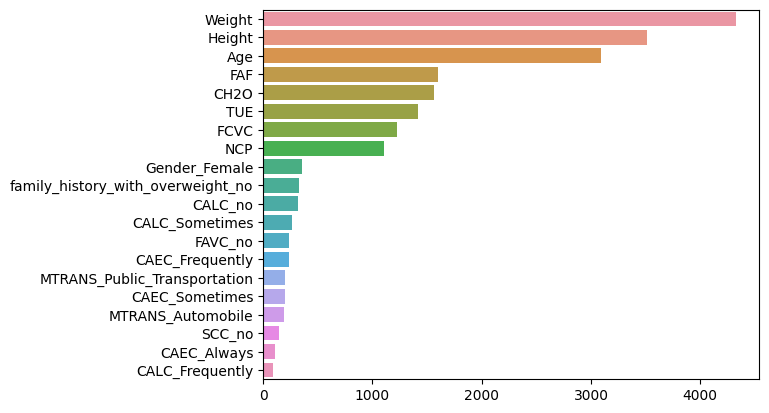

In [13]:
# use seaborn to visualize the importance of the features 
sns.barplot(x=[_ for _, feature in sorted_features[:k]],y=[feature for _, feature in sorted_features[:k]])

I've tried to using the featsure selection but the best result it was with all the featsures.

<a id='ML2'></a>
## `ML - Model Selection`


In [14]:
# # creat x and y
# # x = np.concatenate((s,d),axis=1)
# LE = LabelEncoder()
# X=df_train.drop("NObeyesdad",axis=1).values
# y=LE.fit_transform(df_train["NObeyesdad"])

# # I've got this parameter from this note book: https://www.kaggle.com/code/ddosad/ps4e2-visual-eda-lgbm

# best_params = {
#     "objective": "multiclass",          # Objective function for the model
#     "metric": "multi_logloss",          # Evaluation metric
#     "verbosity": -1,                    # Verbosity level (-1 for silent)
#     "boosting_type": "gbdt",            # Gradient boosting type
#     "random_state": 42,       # Random state for reproducibility
#     "num_class": 7,                     # Number of classes in the dataset
#     'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
#     'n_estimators': 500,                # Number of boosting iterations
#     'lambda_l1': 0.009667446568254372,  # L1 regularization term
#     'lambda_l2': 0.04018641437301800,   # L2 regularization term
#     'max_depth': 10,                    # Maximum depth of the trees
#     'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
#     'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
#     'min_child_samples': 26             # Minimum number of data needed in a leaf
# }


# # model=LGBMClassifier(boosting_type ="dart",learning_rate=.15,importance_type="feature_importances_")

# kf = KFold(n_splits=3, shuffle=True, random_state=42)


# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit the model on the training data
#     model=LGBMClassifier(**best_params)
#     model.fit(X_train, y_train)
#     y3_test_pred=model.predict(X_test)
#     print("accuracy score for LGB is ",accuracy_score(y_test,y3_test_pred))

In [15]:
# creat x and y
x=df_train.drop("NObeyesdad",axis=1).values
# x=df_train[selected_features_ec1].values
y=LE.fit_transform(df_train["NObeyesdad"])

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# I've got this parameter from this notebook: https://www.kaggle.com/code/ddosad/ps4e2-visual-eda-lgbm

best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}

In [18]:
# model=LGBMClassifier(boosting_type ="dart",learning_rate=.15,importance_type="feature_importances_")
model=LGBMClassifier(**best_params)
model.fit(X_train,y_train)
y3_test_pred=model.predict(X_test)
print("accuracy score for LGB is ",accuracy_score(y_test,y3_test_pred))

accuracy score for LGB is  0.9168308163711972


<a id='ML6'></a>

## `Model Selected`

In [19]:
df_test_copy=df_test.copy()
df_test=pd.get_dummies(df_test.drop("id",axis=1)).values
model=model.predict(df_test)
pred=pd.DataFrame({'id':df_test_copy["id"],'NObeyesdad':LE.inverse_transform(model)})
pred.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [20]:
pred.to_csv("submission.csv",index=False)

In [21]:
!head submission.csv

id,NObeyesdad
20758,3
20759,5
20760,4
20761,2
20762,4
20763,0
20764,0
20765,1
20766,6
